In [24]:
import pandas as pd 
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import csv
data = [
    ["hava_durumu", "sicaklik", "nem", "ruzgar", "balik_tutma"],
    ["gunesli", "sicak", "yuksek", "zayif", "hayır"],
    ["gunesli", "sicak", "yuksek", "kuvvetli", "hayır"],
    ["bulutlu", "sicak", "yuksek", "zayif", "evet"],
    ["yagmurlu", "ilik", "yuksek", "zayif", "evet"],
    ["yagmurlu", "soguk", "normal", "zayif", "evet"],
    ["yagmurlu", "soguk", "normal", "kuvvetli", "hayır"],
    ["bulutlu", "soguk", "normal", "kuvvetli", "evet"],
    ["gunesli", "ilik", "yuksek", "zayif", "hayır"],
    ["gunesli", "soguk", "normal", "zayif", "evet"],
    ["yagmurlu", "ilik", "normal", "zayif", "evet"],
    ["gunesli", "ilik", "normal", "kuvvetli", "evet"],
    ["bulutlu", "ilik", "yuksek", "kuvvetli", "evet"],
    ["bulutlu", "sicak", "normal", "zayif", "evet"],
    ["yagmurlu", "ilik", "yuksek", "kuvvetli", "hayır"]
]

In [3]:
with open("baliktutma.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)
  for row in data:
    writer.writerow(row)

csvfile.close()

In [4]:
balik_tutma = pd.read_csv("/content/baliktutma.csv")

In [5]:
balik_tutma.head(9)

,hava_durumu,sicaklik,nem,ruzgar,balik_tutma
0,gunesli,sicak,yuksek,zayif,hayır
1,gunesli,sicak,yuksek,kuvvetli,hayır
2,bulutlu,sicak,yuksek,zayif,evet
3,yagmurlu,ilik,yuksek,zayif,evet
4,yagmurlu,soguk,normal,zayif,evet
5,yagmurlu,soguk,normal,kuvvetli,hayır
6,bulutlu,soguk,normal,kuvvetli,evet
7,gunesli,ilik,yuksek,zayif,hayır
8,gunesli,soguk,normal,zayif,evet


In [6]:
le = LabelEncoder()
balik_tutma["hava_durumu"] = le.fit_transform(balik_tutma["hava_durumu"])
balik_tutma["sicaklik"] = le.fit_transform(balik_tutma["sicaklik"])
balik_tutma["nem"] = le.fit_transform(balik_tutma["nem"])
balik_tutma["ruzgar"] = le.fit_transform(balik_tutma["ruzgar"])
balik_tutma["balik_tutma"] = le.fit_transform(balik_tutma["balik_tutma"])

In [7]:
balik_tutma.head(5)

,hava_durumu,sicaklik,nem,ruzgar,balik_tutma
0,1,1,1,1,1
1,1,1,1,0,1
2,0,1,1,1,0
3,2,0,1,1,0
4,2,2,0,1,0


In [8]:

x = balik_tutma.drop(["balik_tutma"],axis=1)
y = balik_tutma["balik_tutma"]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30)


In [10]:
model = GaussianNB()
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,model_pred)
accuracy

0.8

In [11]:
print(model.predict([[1,0,0,1]]))
print(model.predict([[1,1,0,1]]))
print(model.predict([[1,0,1,1]]))

[0]
[0]
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


MULTINOMIAL NAIVE BAYES

In [12]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [14]:
categories = ["misc.forsale",'talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="test", categories=categories)

In [15]:
print(train.data[6])

From: bbates@pro-freedom.van.wa.us (Brandon Bates)
Subject: WANTED: Video equipment (repost)
Article-I.D.: pro-free.1993Apr21.155915.10932
Organization: ProLine [pro-freedom] AppleVan (Apple UG of Vancouver, WA)
Lines: 11


     I am looking for a working docking deck (deck that goes on back of
camera) for an old JVC GX-S700 Tube video camera.  Any format is
acceptable.  Please send me a message if you even know anything about decks
for the GX-S700.  Also interested in any video equipment for sale,
professional or consumer.  Thank you. 

----
bbates@pro-freedom.van.wa.us   -==-   Pro-Freedom BBS - (206) 694-3276




In [17]:
print(test.data[17])

From: cab@col.hp.com (Chris Best)
Subject: Re: Space Marketing -- Boycott
Organization: your service
Lines: 14
NNTP-Posting-Host: hpctdkz.col.hp.com

> According to the person I talked to, the proposed "billboard"
> will be too small to resolve with the naked eye -- so small
> and visually unimportant... 
> 
>   Anyway, he suggested that the
> visual impact would approximate that of a jumbo jet
> at 45k feet (12km) altitude.

----------

Are you sure he didn't tailor his comments according to what he guessed
you wanted to hear?  In other words, LIE?  Think about it - what good 
would a billboard do for an advertiser if nobody can see it?  Who would
advertise, telescope companies?  Pretty narrow audience here.



In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [19]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

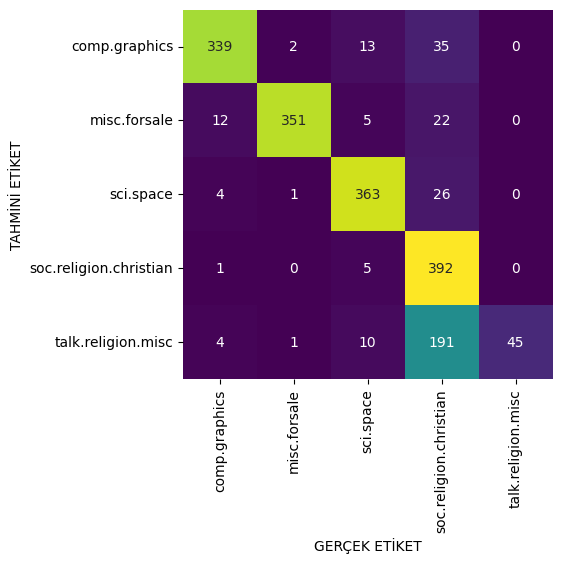

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test.target,labels)
sns.heatmap(cm,annot=True,
            cmap='viridis',
            fmt="d",
            cbar=False,
            square=True,
            xticklabels=train.target_names,
            yticklabels=train.target_names);
plt.xlabel("GERÇEK ETİKET")
plt.ylabel("TAHMİNİ ETİKET");

Buradaki en güzel şey, şimdi bu pipline için predict() yöntemini kullanarak herhangi bir dize 
için kategoriyi belirlemek için araçlara sahip olmamızdır. İşte tek bir dize için tahmini 
döndürecek hızlı bir yardımcı program işlevi aşağıdaki gibidir

In [29]:
def predict_category(s, train=train, model=model):
  tahmin = model.predict([s])
  return train.target_names[tahmin[0]]


In [30]:
predict_category("I can not find CTDS")

'comp.graphics'

In [31]:
predict_category("discussing Islam and atheism")

'soc.religion.christian'

In [32]:
predict_category("a harmonic of the Earth's gravitational field")

'sci.space'

In [33]:
predict_category("I do not think the 550 sold very well")

'soc.religion.christian'

In [34]:
predict_category("Eyes do not lie")

'soc.religion.christian'

Bunun, dizedeki her kelimenin (ağırlıklı) frekansı için basit bir olasılık modelinden daha 
karmaşık bir şey olmadığını unutmayalım; bununla birlikte, sonuç çarpıcıdır. Çok naive bir 
algoritma bile, dikkatli bir şekilde kullanıldığında ve büyük bir yüksek boyutlu veri seti 
üzerinde eğitildiğinde şaşırtıcı derecede etkili olabilir